In [1]:
import psycopg2
from pandas import DataFrame
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Connect database with the set credentials in PG
db_connection = psycopg2.connect(
    user="tester",
    password="1234",
    host="localhost",
    port="5432",
    database="ThesisTry1"
)

#updated query
query = """
SELECT SE."Bruttoleistung", SE."AnzahlModule" 
from solar_extended as SE;
"""
# Create a cursor and execute the query
cursor = db_connection.cursor()
cursor.execute(query)

# Fetch all the rows from the result
results = cursor.fetchall()

df = DataFrame(results)

df.columns = ['Brutto','AnzahlModule']

# Drop rows with missing longitude or latitude values
df = df.dropna()
df['q'] = (df['Brutto'] / df['AnzahlModule']) * 1000
display(df)
brutto_sum = df['Brutto'].sum()
print("BruttoLeistung: ", brutto_sum)
print("Average Q: ", df['q'].mean())
df['q'].to_csv('qratio.csv', index=False)

,Brutto,AnzahlModule,q
0,98.70,420.0,235.000000
1,8.19,42.0,195.000000
2,4.90,28.0,175.000000
3,6.30,27.0,233.333333
4,24.05,98.0,245.408163
...,...,...,...
3299745,8.51,46.0,185.000000
3299746,8.50,32.0,265.625000
3299747,10.34,44.0,235.000000
3299748,3.08,28.0,110.000000


BruttoLeistung:  77556678.50699995
Average Q:  466.21058852405537


,Brutto,AnzahlModule,q
0,98.70,420.0,235.000000
1,8.19,42.0,195.000000
2,4.90,28.0,175.000000
3,6.30,27.0,233.333333
4,24.05,98.0,245.408163
...,...,...,...
3299745,8.51,46.0,185.000000
3299746,8.50,32.0,265.625000
3299747,10.34,44.0,235.000000
3299748,3.08,28.0,110.000000


Total Brutto sum: 37249505.63000001
Total AnzahlModule sum: 146152507.0
q: 431.28333459327797
499.0


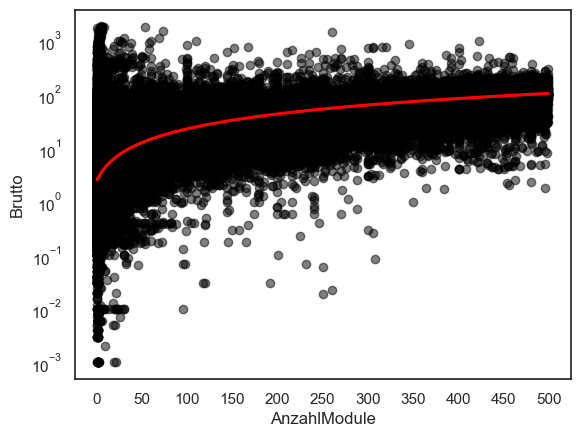

In [3]:
#Just excluding the biggest outliers. But not all. Just over 2000 & AnzahlModule 500
#This is just to show the x axis with interval of 50 and y with logarithmic scale


#display(df)
q_df = df.copy()

#q_df['q'] = (q_df['Brutto'] / q_df['AnzahlModule']) * 1000
# Filter rows where both 'Bruttoleistung' and 'AnzahlModule' are less than 10000
q_df = q_df[(q_df['Brutto'] < 2000) & (q_df['AnzahlModule'] < 500)] 

# Display the modified DataFrame
display(q_df)

# Calculate the total sum for 'Bruttoleistung' and 'AnzahlModule'
total_brutto_sum = q_df['Brutto'].sum()
total_anzahlmodule_sum = q_df['AnzahlModule'].sum()

print(f'Total Brutto sum: {total_brutto_sum}')
print(f'Total AnzahlModule sum: {total_anzahlmodule_sum}')

q = q_df['q'].mean()

print(f'q: {q}')
print(q_df['AnzahlModule'].max())


# Create a heatmap using seaborn
sns.set(style="white")

ax = sns.regplot(data=q_df, x="AnzahlModule", y="Brutto",
                 scatter_kws={"color": "black", "alpha": 0.5},
                 line_kws={"color": "red"})

# Set y-axis to log scale
ax.set_yscale("log")

# Set y-axis ticks with an interval of 50
ax.xaxis.set_major_locator(plt.FixedLocator(range(0, int(q_df['AnzahlModule'].max()) + 50, 50))) #copied from stackoverflow

# Show the plot
plt.show()

,Brutto,AnzahlModule,q
18,5.040,83.0,60.722892
66,2.040,24.0,85.000000
138,16.095,187.0,86.069519
160,3.200,44.0,72.727273
197,11.280,12.0,940.000000
...,...,...,...
3299546,4.200,1.0,4200.000000
3299555,2.665,37.0,72.027027
3299563,23.030,14.0,1645.000000
3299667,5.040,72.0,70.000000


Total outliers_Brutto sum: 6069676.8319999995
Total AnzahlModule sum: 73775415.0
q: 6659.135535049845
Maximum Anzahlmodule 1000000.0


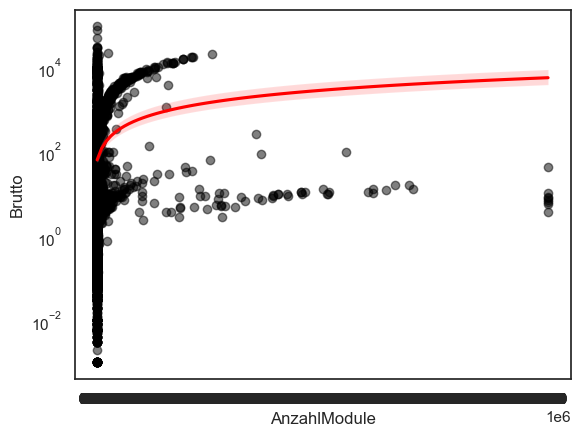

In [3]:
#outliers
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
filtered_df = df[(df['q'] > 800) | (df['q'] < 100)].copy()


# Display the new DataFrame
display(filtered_df)


# Calculate the total sum for 'Bruttoleistung' and 'AnzahlModule'
total_brutto_sum_outliers = filtered_df['Brutto'].sum()
total_anzahlmodule_sum_outliers = filtered_df['AnzahlModule'].sum()

print(f'Total outliers_Brutto sum: {total_brutto_sum_outliers}')
print(f'Total AnzahlModule sum: {total_anzahlmodule_sum_outliers}')

outliers_q = filtered_df['q'].mean()

print(f'q: {outliers_q}')
print("Maximum Anzahlmodule",filtered_df['AnzahlModule'].max())
sns.set(style="white")

ax = sns.regplot(data=filtered_df, x="AnzahlModule", y="Brutto",
                 scatter_kws={"color": "black", "alpha": 0.5},
                 line_kws={"color": "red"})

# Set y-axis to log scale
ax.set_yscale("log")

# Set y-axis ticks with an interval of 50
ax.xaxis.set_major_locator(plt.FixedLocator(range(0, int(filtered_df['AnzahlModule'].max()) + 50, 50)))

# Show the plot
plt.show()

In [4]:
error_rate = total_brutto_sum_outliers/brutto_sum
print(error_rate*100, "%")

7.826117555372327 %


,Brutto,AnzahlModule,q
0,98.70,420.0,235.000000
1,8.19,42.0,195.000000
2,4.90,28.0,175.000000
3,6.30,27.0,233.333333
4,24.05,98.0,245.408163
...,...,...,...
3299745,8.51,46.0,185.000000
3299746,8.50,32.0,265.625000
3299747,10.34,44.0,235.000000
3299748,3.08,28.0,110.000000


Total withoutoutliers_Brutto sum: 71430736.37499999
Total withoutoutliers AnzahlModule sum: 265874933.0
q: 292.2951895213013


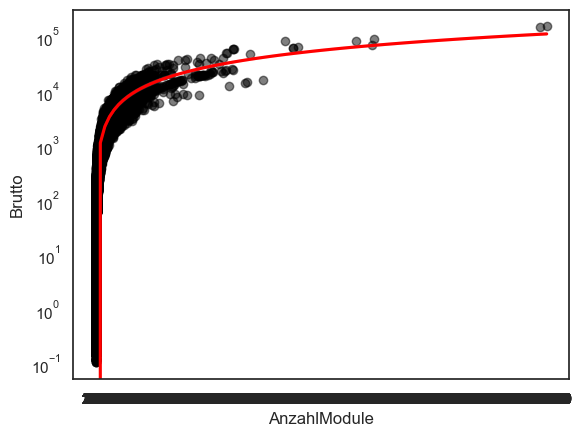

In [7]:
#Without_outliers and no limit in Anzahlmodule
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
filtered_df = df[(df['q'] < 800) & (df['q'] > 100)].copy()
#filtered_df = filtered_df[(filtered_df['Brutto'] < 2000) & (filtered_df['AnzahlModule'] < 500)] 

# Display the new DataFrame
display(filtered_df)


# Calculate the total sum for 'Bruttoleistung' and 'AnzahlModule'
total_brutto_sum_withoutoutliers = filtered_df['Brutto'].sum()
total_anzahlmodule_sum_withoutoutliers = filtered_df['AnzahlModule'].sum()

print(f'Total withoutoutliers_Brutto sum: {total_brutto_sum_withoutoutliers}')
print(f'Total withoutoutliers AnzahlModule sum: {total_anzahlmodule_sum_withoutoutliers}')

outliers_q = filtered_df['q'].mean()

print(f'q: {outliers_q}')

sns.set(style="white")

ax = sns.regplot(data=filtered_df, x="AnzahlModule", y="Brutto",
                 scatter_kws={"color": "black", "alpha": 0.5},
                 line_kws={"color": "red"})

# Set y-axis to log scale
ax.set_yscale("log")

# Set y-axis ticks with an interval of 50
ax.xaxis.set_major_locator(plt.FixedLocator(range(0, int(filtered_df['AnzahlModule'].max()) + 50, 50)))

# Show the plot
plt.show()

In [6]:
success_rate = total_brutto_sum_outliers/brutto_sum
print(success_rate*100, "%")
print(total_brutto_sum_outliers)
print(brutto_sum)

92.10133511397466 %
71430736.37499999
77556678.50699995


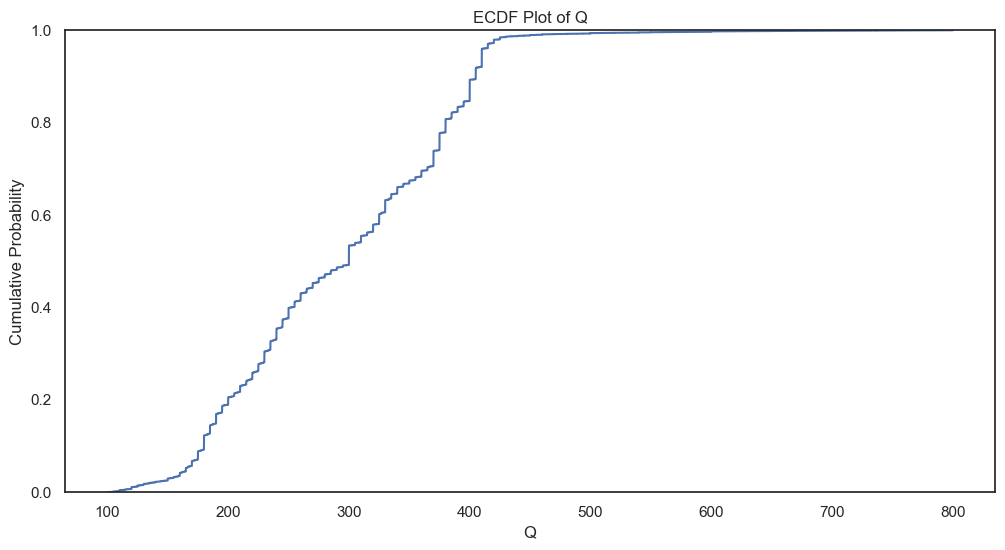

In [8]:
#Without_outliers
# Create a new DataFrame containing rows where 'q' is not between 300 and 500
#filtered_df = df[(df['q'] < 1000) & (df['q'] >0)].copy()
filtered_df = filtered_df[(filtered_df['Brutto'] < 2000) & (filtered_df['AnzahlModule'] < 500)] 
# Plot ECDF using Seaborn
plt.figure(figsize=(12, 6))
#sns.displot(filtered_df['q'], kind="ecdf")
sns.ecdfplot(data=filtered_df, x='q')
plt.title('ECDF Plot of Q')
plt.xlabel('Q')
plt.ylabel('Cumulative Probability')
plt.show()